## **23.02.19 check frequency order parameter**

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_theta_dtheta as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_sampling as sampling
from TO_sim.Sol_Kuramoto import Make_order_parameter as make_r
from TO_sim.Utility import Create_Folder
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf as func
from TO_sim.gen_Distribution import Normal
import scipy.integrate as SI
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


In [185]:
DF = 'Review/23.02.19 check frequency order parameter/'
Create_Folder(DF)

In [186]:
N =500
theta_random,omega,Kc = Normal(N,0,1,seed=10)
omega = np.sort(omega)
theta0 = np.ones_like(theta_random)

In [187]:
dt = 0.1

m = 6
t = np.arange(0,500+dt/2,dt)
t_sample = [1+1.08**k for k in range(100)]
t_sample_idx = np.searchsorted(t,t_sample)

In [132]:
Ks = np.arange(1,50,0.1)
print(len(Ks))

490


In [133]:
theta_s,dtheta_s = {},{}

In [134]:
df = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)
rdf = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)

for i,(K,(df.theta[K],df.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega,pm_processes=15,pm_pbar=True))):pass
for i,(K,(rdf.theta[K],rdf.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta0,p_dtheta= np.zeros_like(omega),p_omega=omega,pm_processes=15,pm_pbar=True))):pass


  0%|          | 0/490 [00:00<?, ?it/s]

  0%|          | 0/490 [00:00<?, ?it/s]

In [136]:
df['r'] = df.theta.apply(make_r,N=N)
rdf['r'] = rdf.theta.apply(make_r,N=N)

In [137]:
mean_r = lambda x: np.mean(x[-200:])
std_r = lambda x: np.std(x[-200:])


In [138]:
df['r_mean'] = df.r.apply(mean_r)
df['r_std'] = df.r.apply(std_r)

rdf['r_mean'] = rdf.r.apply(mean_r)
rdf['r_std'] = rdf.r.apply(std_r)

In [139]:
df['V_mean'] = df.V.apply(mean_r)
df['V_std'] = df.V.apply(std_r)

rdf['V_mean'] = rdf.V.apply(mean_r)
rdf['V_std'] = rdf.V.apply(std_r)

In [140]:
from TO_sim.To_Draw import Draw_theoretical_wData as DD

In [170]:
Draw_ = DD(m)

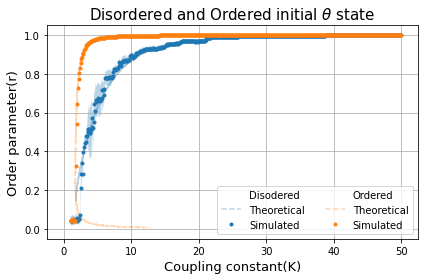

In [254]:
categories = ['Theoretical', 'Simulated']

fw,(bw,bwd) = Draw_.total()

plt.fill_between(Ks,df.r_mean-df.r_std,df.r_mean+df.r_std,alpha=0.3)
err_fw,  = plt.plot(Ks,df.r_mean,'.')

plt.fill_between(Ks,rdf.r_mean-rdf.r_std,rdf.r_mean+rdf.r_std,alpha=0.3)
err_bw, = plt.plot(Ks,rdf.r_mean,'.')

p5, = plt.plot([0], marker='None',
        linestyle='None', label='dummy-tophead')
p7, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')


fw.set_linestyle('--')
bw.set_linestyle('--')
bwd.set_linestyle('--')


fw.set_alpha(0.3)
bw.set_alpha(0.3)
bwd.set_alpha(0.3)

leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                    [r'Disodered'] + categories + [r'Ordered'] + categories,
                    loc = 4,ncol=2) # Two columns, vertical group labels
plt.grid()
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylabel('Order parameter(r)',fontsize=13)

plt.title(r'Disordered and Ordered initial $\theta$ state',fontsize=15)
plt.tight_layout()

plt.savefig(DF+'K vs r graph.png',dpi=400)

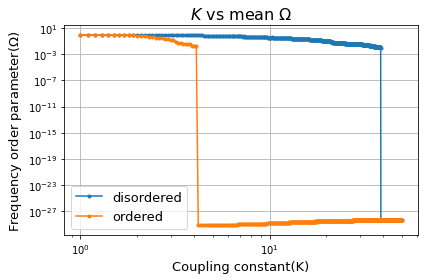

In [255]:
# plt.fill_between(Ks,df.V_mean-df.V_std,df.V_mean+df.V_std,alpha=0.3)
# plt.errorbar(Ks,df.V_mean,df.V_std)
plt.plot(Ks,df.V_mean,'.-',label='disordered')

# plt.fill_between(Ks,rdf.V_mean-rdf.V_std,rdf.V_mean+rdf.V_std,alpha=0.3)
plt.plot(Ks,rdf.V_mean,'.-',label='ordered')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylabel(r'Frequency order parameter($\Omega$)',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.title(r'$K$ vs mean $\Omega$',fontsize=16)
plt.tight_layout()
plt.savefig(DF+'K vs mean Omega.png',dpi=400)

(0.0, 1.0)

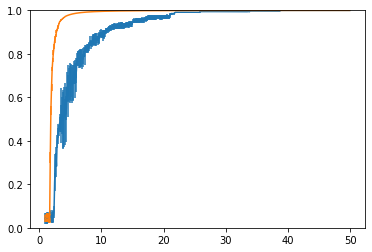

In [145]:
plt.errorbar(Ks,df.r_mean,df.r_std)
plt.errorbar(Ks,rdf.r_mean,rdf.r_std)
plt.ylim(0.,1)

In [200]:
color = plt.cm.viridis(np.linspace(0,1,len(Ks)))

In [201]:
min_V = lambda x: np.min(x[10:])

min_dfV = df.V.apply(min_V)
min_rdfV = rdf.V.apply(min_V)
df_first = np.where(min_dfV<1e-12)[0][0]
rdf_first = np.where(min_rdfV<1e-12)[0][0]

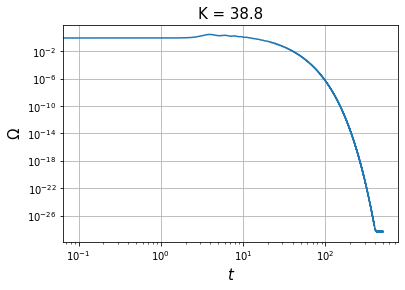

In [203]:
plt.plot(t,df.V.iloc[df_first])
plt.title(f'K = {Ks[df_first]:.1f}',fontsize=15)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\Omega$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.grid()

In [204]:
1000 * 1000

1000000

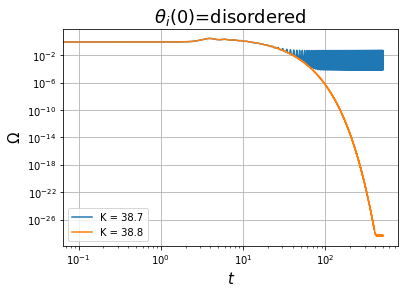

In [206]:
# fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)

plt.plot(t,df.V.iloc[df_first-1],label=f'K = {Ks[df_first-1]:.1f}')
plt.plot(t,df.V.iloc[df_first],label=f'K = {Ks[df_first]:.1f}')
plt.title(r'$\theta_i(0)$=disordered',fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\Omega$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.grid()
plt.legend()

plt.savefig(DF+'Frequency Entrainment at disordered.png',dpi=400)

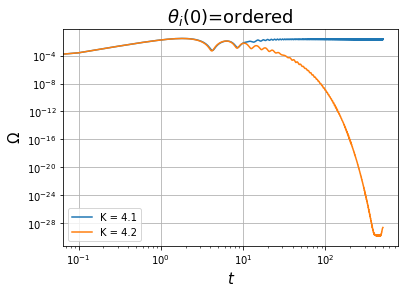

In [207]:
# fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)

plt.plot(t,rdf.V.iloc[rdf_first-1],label=f'K = {Ks[rdf_first-1]:.1f}')
plt.plot(t,rdf.V.iloc[rdf_first],label=f'K = {Ks[rdf_first]:.1f}')
# plt.title(f'K = {Ks[rdf_first-1]:.1f},{Ks[rdf_first]:.1f}')
plt.title(r'$\theta_i(0)$=ordered',fontsize=18)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\Omega$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.grid()
plt.legend()
plt.savefig(DF+'Frequency Entrainment at ordered.png',dpi=400)


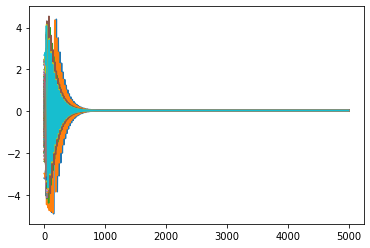

In [153]:
# plt.plot(df.dtheta.iloc[df_first-1]);
plt.plot(df.dtheta.iloc[df_first]);


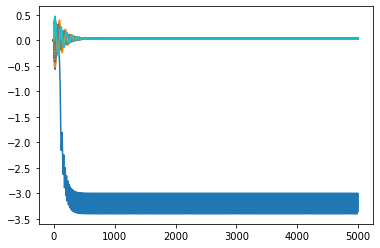

In [154]:
plt.plot(rdf.dtheta.iloc[rdf_first-1]);

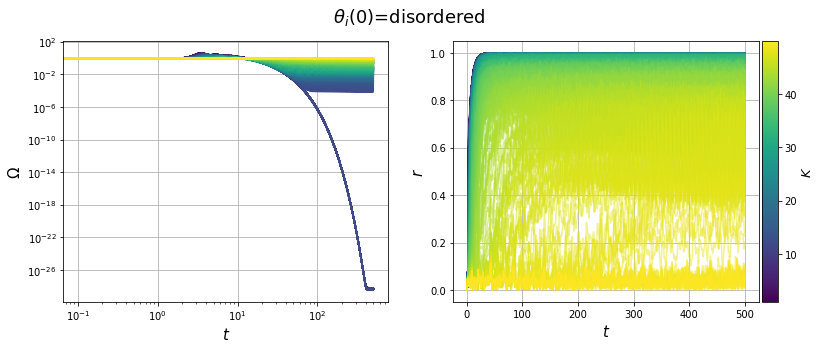

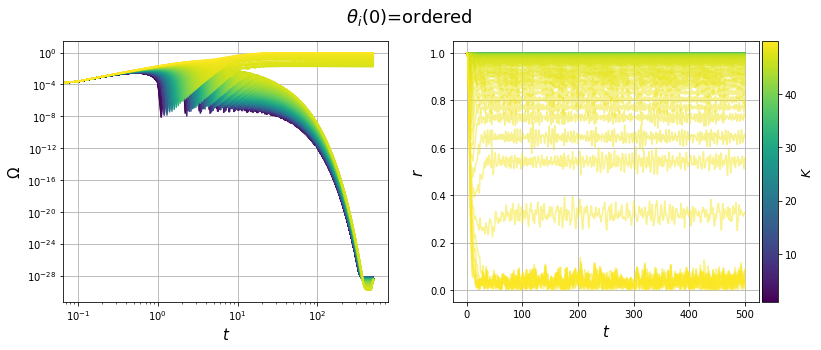

In [212]:
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
sca = plt.scatter(0*Ks,0*Ks,s=0*Ks,c=Ks)
for i,V in enumerate(df.V.iloc[::-1]):
    plt.plot(t,V,color = color[i])
plt.grid()

plt.ylabel(r'$\Omega$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)

plt.xscale('log')
plt.yscale('log')
# plt.ylim(1e-8)
plt.subplot(122)
plt.grid()


for i,r in enumerate(df.r.iloc[::-1]):
    plt.plot(t,r,color = color[i],alpha=0.5)
plt.ylabel(r'$r$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.suptitle(r'$\theta_i(0)$=disordered',fontsize=18)

ax =plt.gca()
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sca, cax=cax)
cbar.set_label(r'$K$',fontsize=13)

plt.savefig(DF+f't vs omega and r disordered.png',dpi=400)

plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
plt.grid()
plt.ylabel(r'$\Omega$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)

for i,V in enumerate(rdf.V.iloc[::-1]):
    plt.plot(t,V,color = color[i])
plt.xscale('log')
plt.yscale('log')
plt.subplot(122)
plt.grid()
plt.ylabel(r'$r$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
for i,r in enumerate(rdf.r.iloc[::-1]):
    plt.plot(t,r,color = color[i],alpha=0.5)
plt.suptitle(r'$\theta_i(0)$=ordered',fontsize=18)

ax =plt.gca()
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sca, cax=cax)
cbar.set_label(r'$K$',fontsize=13)


plt.savefig(DF+f't vs omega and r ordered.png',dpi=400)


## r standard deviation hightest

In [213]:
rstd_max_idx = df.r_std.argmax()

Text(0.5, 1.0, 'K = 4.1')

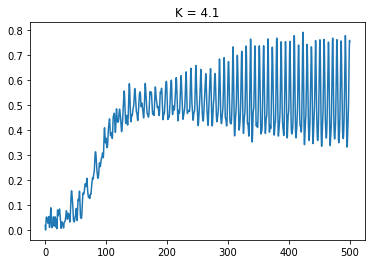

In [214]:
plt.plot(t,df.r.iloc[rstd_max_idx])
plt.title(f'K = {Ks[rstd_max_idx]:.01f}')

In [251]:
K_idx = rdf_first
theta_temp = rdf.theta.iloc[K_idx][-5,:]
i,j = np.meshgrid(theta_temp,theta_temp)

In [250]:
rstd_max_idx,rdf_first

(31, 32)

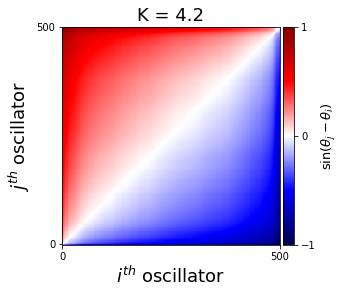

In [252]:
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([0,500])
plt.yticks([0,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
plt.title(f'K = {Ks[K_idx]:.01f}',fontsize=18)
ax =plt.gca()
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=13)

plt.savefig(DF+'ordered, phase locking.png',dpi=400)

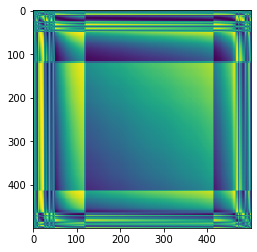

In [222]:
plt.imshow(np.sin(theta_i-theta_j))

In [12]:
# theta_s,dtheta_s = sampling(N,K,m,t,t_sample_idx,theta,omega,omega)
theta_s,dtheta_s = sim(K,N,m,t,theta0,omega,omega)

# sol,info = SI.odeint(func,np.r_[theta,omega],t,args=(omega,N,m,K),full_output=1)

In [5]:
theta_s = sol[:,:N]
dtheta_s = sol[:,N:]

[]

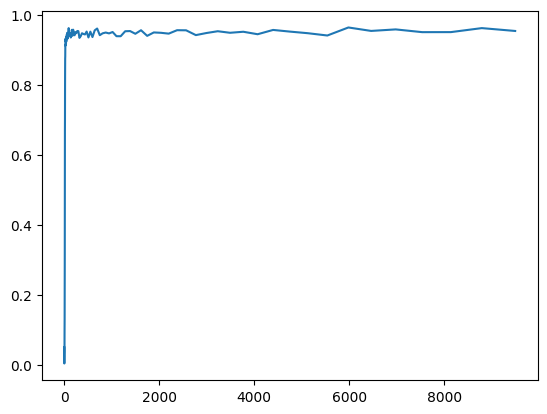

In [6]:
r = make_r(theta_s,N)
plt.plot(t_sample,r)
plt.plot()

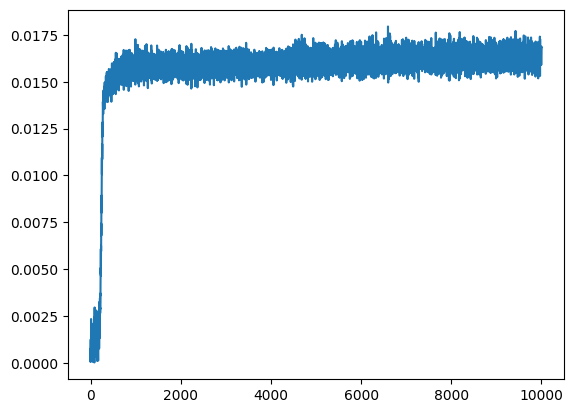

In [125]:
plt.plot(t,r)

In [8]:
var_dtheta = np.var(dtheta_s,axis=1)

In [39]:
import sys

In [41]:
sys.getsizeof(theta_s)

128

In [ ]:
t = np.arange(tspan[0],tspan[1]+dt/2,dt)
A = SI.solve_ivp()
